# Avis Restau ("Améliorez le produit IA de votre start-up")

La startup "Avis Restau" met en relation des client et des restaurent afin d'améliorer les services fournies par les entreprises pour les clients et d'améliorer la visibilité des entreprises.

<!-- <img src="img/logo.png" width="500" style="center"> -->
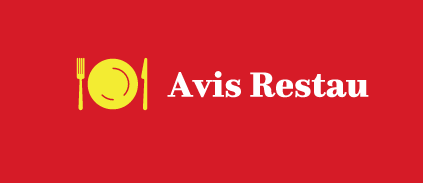

La startup souhaite améliorer sa platforme avec une nouvelle foncitonnalité de collaboration. Grace à celle-ci, les utilisateurs pourront par exemple poster des avis et des photos sur leur restaurent préférer. Ce sera aussi l'occasion pour les entreprise de mieux comprendre les avis posté par les utilisateurs.

Le but de ce projet ce résume ici par 2 objectifs principaux : 
 - La réalisation d'un algorithme de détection de sujet d'insatisfaction pour les commentaires laissé par les utilisateurs qui analyse les sujet principaux d'insatisfaction d'un client.
 - La réalisation d'un algorithme de classification des photos publiées par les utilisateurs sur un restaurent.

## Sommaire :

#### Partie général

- Présentation de l'ETL
- Présentation des données receuillies
- Présentation structure des jeux de données source
- Présentation général des jeux de données source

#### Partie NLP ("Natural Language Processing")

- Présentation rapides des recherches
- Présentation du model final
- Test / résultat en application

#### Partie CV ("Computer Vision")

- Présentation rapides des recherches
- Présentation des modèles finaux
- Test / résultat en application sur les modèles finaux



# Partie général

Pour ce projet, il existe une grande banque de données disponnible sur le site <a href="https://www.yelp.fr/">"Yelp"</a>, qui référence toutes sorte d'avis et photo dans le monde sur différentes entreprises/restaurants.

Yelp mais à disposition une API pour récupérer les informations/commentaire sur les différentes entreprises disponible sur leur site, et mettent également à disposition une banque de données contenant des images labéliser et des information et commentaire sur les différente entreprise à <a href="https://www.yelp.com/dataset/download">télécharger ici</a>

J'ai donc d'abord créer un ETL ("Extract Transform and Load") pour recupérer les informations nécessaires via l'API fournie par  Yelp

## ETL

<img src="img/icon/database.png" width="200" style="center">

L'obtention des accès à l'API sont disponnible sur <a href="https://www.yelp.com/developers">cette page</a>.

L'API fourni par Yelp, ne permet d'utiliser que 5000 requêtes mensuel, ce qui est largement suffisant dans notre contexte.

<img src="img/API.jpg" width="600" style="center">

L'ETL est executable par un script python qui permet de récupérer les informations de différentes villes/états qui sont ensuite stocker dans le dossier archive avec la date de création voici un example du contenue récuperer par une exécution de l'ETL

Pour avoir une idée du contenue que renvoie l'API voici une image du retour de l'API :

<img src="img/response_api.JPG" width="1000" style="center">

puis les données une fois passé par l'ETL son donc transfomer et charger des des fichier csv.

## Données de l'API (traité par l'ETL)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

business = pd.read_csv("./archive/yelp_academic_dataset_business_1632329699.csv")
business.head(2)

,business_id,name,is_open,review_count,latitude,longitude,adress,city,postal_code,state,stars
0,V25xzPlcNAtnTi_xzQvr9g,Brassica,True,1174,39.976380,-83.002940,680 N High StNone,Columbus,43215,OH,4.5
1,2qwtLyomP0QHusZvDYMvEw,Hot Chicken Takeover,True,1275,39.971609,-83.004354,59 Spruce StNoneNorth Market,Columbus,43215,OH,4.5


In [2]:
review = pd.read_csv("./archive/yelp_academic_dataset_review_1632329699.csv")
review.head(2)

,review_id,business_id,user_id,text,stars,date
0,pNEMgQXoFreasJKjwmTgjg,V25xzPlcNAtnTi_xzQvr9g,AFsPcbupj3g4RfwuPFTXeA,this became one of my go-to places in Columbus...,5,2021-08-20 10:43:52
1,QKXjR9bYJmavbLXe9TDQqA,V25xzPlcNAtnTi_xzQvr9g,TYDUn6hXCQvJYP8Iofl-yQ,"Driving through Ohio, we were searching for a ...",5,2021-07-09 06:03:06


le code source de cette ETL ce situe dans le fichier `ETL.py` et utilise le fichier `list_city.txt` pour récupérer les différente information (présenté ci-dessus) des villes.

## Jeu de donnée sources

<img src="img/icon/server.png" width="200" style="center">

Yelp fournie un dataset très fournie, ont y retrouve 6 fichiers (au format json dont un fichier de reviews contenant 8.000.000 commentiares) et un dossier de photos (200.000 photos)

Voici la strucutre des fichier fournie :

<img src="img/structure_json_file.png" width="1000" style="center">

La structure contient des données qui ne sont pas nécessaire à notre analyse. 

Le fichier tip_dataset et checkin_dataset ne sont pas utile pour notre problèmatique, les fichier principaux sont photos_dataset et review_dataset que l'on associe à leur business_dataset pour avoir des informations qui peuvent être intéressante, comme le type d'entreprise (car on cherche ici uniquement les entreprise de restauration ou de boisson) et la géolocalisation *(j'ai également ajouté le fichier user pour avoir des informations relatives sur le type de user que je n'ai finalement pas exploité)*

## Présentation des fichiers sources

<img src="img/icon/analysis.png" width="200" style="center">


Le fichier business_dataset comprend des information sur le type d'entreprise, le nom, la géolocalisation, l'adresse, la note moyenne, les horaire d'ouverture.

Les informations sur le type d'entreprise ma permis de filtrer les entreprise de restauration (rapide/restaurant/bar).
Les autres informations ne sont pas nécessaires pour notre contexte mais peuvent être intéressante à exploiter pour d'autre problématiques (l'analyse exploratoire des jeux de données ce situe dans le notebook `P06_analyse.ipynb`).

Grâce à ce premier filtre, j'ai éliminer les photos et commentaires n'appartenant pas à une entreprise de restauration.
Pour les fichier photos et reviews, les informations ce limité globalement aux photos (non de l'image dans le repertoire + ".jpg")

J'ai donc créer 2 nouveaux fichiers contenant uniquement les informations nécessaires à notre contexte.

In [3]:
review = pd.read_feather("./data/dataset_global/yelp_academic_final_dataset_review")
review.head(2)

,review_id,stars,text,date,name_business,complete_address,name_user,user_id
0,lWC-xP3rd6obsecCYsGZRg,4.0,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,Prides Osteria,MA - (Beverly) :\n240 Rantoul St \nPostal code...,Mel,ak0TdVmGKo4pwqdJSTLwWw
1,8bFej1QE5LXp4O05qjGqXA,4.0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,Target,MA - (Framingham) :\n400 Cochituate Rd \nPosta...,Brandon,YoVfDbnISlW0f7abNQACIg


In [4]:
photo = pd.read_feather("./data/dataset_global/yelp_academic_final_dataset_photo")
photo.head(2)

,photo_id,label,photo
0,Un_Og6jfhazVn7CxszkKEw,drink,./data/dataset_photo/photos/Un_Og6jfhazVn7Cxsz...
1,BFE1AFOs27scnnfeBf99ZA,drink,./data/dataset_photo/photos/BFE1AFOs27scnnfeBf...


Ces 2 fichiers contiennent les informations nécessaires pour les 2 objectifs, CV (Computer Vision) avec le fichier photo et NLP (Natural Language Processing)  avec le fichier reviews.

# NLP

## Recherches effectuées

<img src="img/icon/laptop.png" width="200" style="center">

J'ai structurer mes étape de recherche comme suis:
- Nettoyage des document
- Préparation des données vectorisation TFIDF et/ou BagOfWord
- Test de différentes approches (LSA / LDA)

En tout premier lieux, j'ai séparer les commentaires bon (supérieur à 3) et mauvais (inférieur à 3), pour ne garder que les mauvais commentaires sois environ 1.200.000 commentaires.

Voici la répartition des mots de ces 1.2M de commentaires mauvais (avec suppression des stop_word et lowercase) sous forme de nuage de mot (les mots les plus présents on une font-size plus importante):

<img src="img/global_wordcloud.png" width="600" style="center">

On retrouve les thèmes liée à la restauration comme "food drink, service, meal"...

J'ai donc commencer par nettoyer le jeu de données en utilisant la librairie "Spcay", cette librairie permet de faciliter le traitement du language naturel, voici un example ci-dessous de sont implémentation pour retrouver les types d'entités présent dans un texte et les différentes dependances/tag :

In [5]:
# !python -m spacy download en_core_web_sm

In [7]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm",disable=["parser"])
r = nlp(review.iloc[42]["text"])
displacy.render(r,style='ent',jupyter=True)

In [8]:
displacy.render(r,style='dep',jupyter=True,options={'distance': 60})

Cette mise en application peut être intéressante notament sur le tag des différent type de token (pour identifier les verbe, adjectif...) cela permet de filtrer les information utile, par example les déterminants son généralement assez peu intéressant pour identifier les différrents topic, j'ai donc nettoyer le jeu de données et garder uniquement les verbe, adjectif, adverbe et nom commun.

In [8]:
# !pip install gensim
# !pip install pyLDAvis

In [10]:
import pickle
import function_nlp as fnct

# Récupération du cleaner
open_cleaner = open("./data/pickle/cleaner_nlp_1","rb")
prepared_data = pickle.load(open_cleaner)
open_cleaner.close()

# attribution du label
def score_define(x):
    if x >= 4:
        return "good"
    elif x == 3:
        return "neutral"
    else:
        return "bad"
    
review["label"] = review["stars"].apply(lambda x: score_define(x))
bad_reviews = review[review["label"] == "bad"]["text"]

In [11]:
%%time
sample_bad_review = bad_reviews.sample(100000,random_state=42)
nlp = spacy.load("en_core_web_sm",disable=["parser","ner"])
data = [doc for doc in nlp.pipe(sample_bad_review,n_process=90,batch_size=2000)]

CPU times: user 2min 2s, sys: 27.3 s, total: 2min 29s
Wall time: 3min 10s


In [12]:
import gensim
nlp = spacy.load("en_core_web_sm")

def clean_data(doc,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'],):
    all_stopword = nlp.Defaults.stop_words
    return [token.lemma_ for token in doc if (token.pos_ in allowed_postags) and (not token.text in all_stopword)]

all_review_clean = [clean_data(doc) for doc in data]

bigram = gensim.models.Phrases(all_review_clean, min_count=2, threshold=80) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[all_review_clean],threshold=80)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_trigrams(all_doc):
    return [trigram_mod[doc] for doc in all_doc]

data_clean_trigram = make_trigrams(all_review_clean)

In [13]:
print("before :\n")
print(sample_bad_review.iloc[0])
print()
print("after :\n")
print(" ".join(data_clean_trigram[0]))

before :

I decided to meet someone here for coffee, and when I arrived, I needed to go to the bathroom.  But they are so tiny that they didn't have one, so they sent me across the street to the gift shop.  But the gift shop was closed, so I came back and asked where else I could go to the bathroom.  They told me to go to the library, so I walked all the way to the library, but that was also closed, so we wound up leaving.  Folks, this is not a good place to meet someone.  I have never heard of a coffee shop that didn't have a bathroom in it.  I also don't see how or why the place is called Bohemian.  Not only that, but there is hardly any seating.  Not a good experience, and I particularly didn't appreciate being sent on a wild goose chase just to go to the bathroom.

after :

decide meet coffee arrive need bathroom tiny send street gift_shop gift_shop closed come ask bathroom tell library walk way library close wound leave folk good place meet hear coffee shop bathroom place call har

Une fois les données nettoyer, on peut tester les différentes approches. J'ai d'abord essayé l'approche LDA avec le jeu de données nettoyé, et j'ai appliqué la vectorisation par "sac de mot" (Bag Of Word) qui donne une matrice des mots contenue dans chaque document.

J'ai rechercher le meilleur nombre de topic avec l'algorithme de cohérence qui compare la distribution des topic par rapport au jeu de données et voici le résutlat :

<img src="img/coherence_model_lda.png" width="500" style="center">

J'ai donc essayer 10 et 11 topic. L'ensemble des test réaliser sont dans le fichier `P06_nlp.ipynb`.

Voici un example du résultat de cette implémentation :

In [14]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models
# Create Dictionary
id2word = Dictionary(data_clean_trigram)

# Create Corpus
texts = data_clean_trigram

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# LDA
ldamodel_10 = LdaMulticore(corpus=corpus,id2word=id2word,
                           num_topics=10, random_state=42,workers=60)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel_10, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.000268 -0.012298       1        1  18.445151
0     -0.006591 -0.001704       2        1  15.176961
2     -0.006819  0.006812       3        1  11.311161
5     -0.000842 -0.003601       4        1  10.891539
3     -0.011029  0.002686       5        1   9.768541
9     -0.005152 -0.000262       6        1   9.257949
6     -0.002736  0.001415       7        1   8.036079
1      0.015262  0.020188       8        1   7.486523
7     -0.004387 -0.001933       9        1   6.168431
8      0.022025 -0.011304      10        1   3.457665, topic_info=       Term          Freq         Total Category  logprob  loglift
38     food  83756.000000  83756.000000  Default  30.0000  30.0000
23    place  57256.000000  57256.000000  Default  29.0000  29.0000
14     good  52358.000000  52358.000000  Default  28.0000  28.0000
145  minute  26598.000000  26598.000000  Default  27.0000  27.0000
2       ask  33315.000000  33315.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
267    wait    734.283233  34844.744497  Topic10  -5.4343  -0.4952
124     sit    601.885798  14622.475372  Topic10  -5.6331   0.1743
243     say    636.469077  29019.668723  Topic10  -5.5772  -0.4552
100    look    616.775334  21336.172623  Topic10  -5.6086  -0.1791
201   great    608.908100  18364.997783  Topic10  -5.6215  -0.0420

[864 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
29235      8  0.818213    -felt
41782      7  0.362488  -nobody
21944      3  0.490167   -waite
21944      7  0.163389   -waite
21944     10  0.163389   -waite
...      ...       ...      ...
320        7  0.055966     year
320        8  0.072617     year
320        9  0.045328     year
320       10  0.016651     year
43106      8  0.818205   ~we're

[2429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 6, 4, 10, 7, 2, 8, 9])

Ce graphique représente sur le un plan 2D la répartition des topics et sur chaque topic selectionné on voir la répartition des mot du topic par rapport au jeu de données global sur la partie gauche

On remarque ici qu'il est difficile d'interpréter les résutlats. 

Avec d'autre nombre de topic et même avec une vectorisation par TF-IDF, il est toujours difficile d'interpréter les résultats, je me suis donc dirigé vers une approche de réduction de dimension par LSA (Latent Semantic Allocation) grâce à la factorisation SVD tronqué proposé par Sklearn (TruncatedSVD) 

## Modélisation finale

<img src="img/icon/book.png" width="200" style="center">

Le modèle final est une réduction de dimension LSA avec 18 composante, on retrouve plusieurs catégorie intéressante liée à l'attente des clients, la nourritures, le prix, la livraisons... cela permet d'avoir une idée des commentaires écrit et des catégories/topic.

Le modèle permet de connaitre le pourcentage de chaque catégorie/topic pour un document données en voici un example :

In [19]:
open_lsa_model = open("./data/pickle/lsa_model","rb")
best_model = pickle.load(open_lsa_model)
open_lsa_model.close()

 Voici le résutlat des différents topics :

In [20]:
for index,topic in enumerate(best_model.components_):
    print("Topic #"+str(index))
    print(" ".join([prepared_data["tfidfvectorizer"].get_feature_names_out()[i] for i in topic.argsort()[-15:]]))
    print()

Topic #0
restaurant table bad ask get minute go wait good service come time place order food

Topic #1
come customer take manager sit drink hour seat order say ask tell table minute wait

Topic #2
topping time sauce deliver pick slice tell say phone crust cheese call delivery order pizza

Topic #3
slow location horrible well great terrible good staff rude food place customer bad service pizza

Topic #4
chicken time horrible cold take delivery terrible slow bad hour minute service wait order food

Topic #5
crust beer waiter waitress good come sit bar server seat minute drink wait table pizza

Topic #6
open fry people good drive coffee long hour sandwich time line burger minute place wait

Topic #7
wrong cheese great slow take coffee good bartender service fry beer bar order drink burger

Topic #8
horrible pizza ask table terrible rude cheese wait sandwich customer bad fry service chicken burger

Topic #9
open price cold reservation delivery manager call eat tell say hour fry restaurant 

In [21]:
review_test = 40
test = bad_reviews.iloc[review_test]
print(test)
data = prepared_data.transform([test])
pred = best_model.transform(data)
print("Prediction :")
fnct.prediction(pred,global_dic=False)

The food has always been good, always. The service on he other hand has always always been bad. The waiters always leave you hanging, the owner is rude and, sad to say, ghetto in front of customers. Again, the food is spot on but the service is horrible. I have been coming here for years and it never changes. We are here today, the first time in a couple months and they have renovated. They have expanded into the unit next door. Good renovation, bigger space, better decor. Still a ways to go before it is finished but good. Wish the service was better, unfortunately I doubt I will return. I think today was it.
Prediction :


{'Insatisfaction général': 0.2496913356279716,
 'Service client': 0.1787382528768807,
 'positivité': 0.08390101088555023,
 'Nourriture et boisson (poulet / poulet pané)': 0.06659072374081938,
 'Prix (trop élevé / qualité prix)': 0.057184589842932766,
 'Livraison (sur place)': 0.05447653592405492,
 'Nourriture et boisson (burger + boisson)': 0.01795406455292097,
 'Nourriture et boisson (Poisson)': 0.012957031437932425,
 'Temporalité / Attente': 0.012120119758532204,
 'Nourriture et boisson (burger)': -0.009462828743931836,
 'Nourriture et boisson (Sandwich)': -0.02408390856867492,
 'Café ou petit dej': -0.048721500350702635,
 'Attente': -0.05039521813441432,
 'Nourriture et boisson (bière / poulet)': -0.05234447438763154,
 'Attente (café / dessert / petit dej)': -0.05779879262877103,
 'Prix (autre)': -0.06698461071746237,
 'Nourriture et boisson (pizza + boisson)': -0.06837021826415653,
 'Livraison (à emporter)': -0.08215097367122248}

In [22]:
test = "it took about 15 minutes to come out. Horrible service im waiting 15 minute seating on my chair to get my meal!"
print(test)
data = prepared_data.transform([test])
pred = best_model.transform(data)
print("Prediction :")
fnct.prediction(pred,global_dic=False)

it took about 15 minutes to come out. Horrible service im waiting 15 minute seating on my chair to get my meal!
Prediction :


{'Attente': 0.24555429179499066,
 'Insatisfaction général': 0.22136338418205725,
 'Livraison (sur place)': 0.20846094230420778,
 'Nourriture et boisson (poulet / poulet pané)': 0.14284811984382528,
 'Prix (trop élevé / qualité prix)': 0.13736808116110674,
 'Nourriture et boisson (pizza + boisson)': 0.12067495439035932,
 'Attente (café / dessert / petit dej)': 0.07964322102995923,
 'Nourriture et boisson (Poisson)': 0.031208429469701787,
 'Prix (autre)': 0.014925875765409095,
 'Café ou petit dej': -0.004365833324276106,
 'Nourriture et boisson (burger + boisson)': -0.004690422883050215,
 'positivité': -0.010993214586870501,
 'Nourriture et boisson (bière / poulet)': -0.03088222341603086,
 'Service client': -0.033170847008676355,
 'Nourriture et boisson (Sandwich)': -0.03810580450659701,
 'Livraison (à emporter)': -0.05248986810769029,
 'Nourriture et boisson (burger)': -0.08848172949594932,
 'Temporalité / Attente': -0.09891706063216486}

On voit que globalement les catégories sont bien définie et que les catégorie dominante sont bien identifié.

Ce modèle peut être améliorer avec l'entraienement sur la totalité des données par example et une recherche plus approfondie des vrais sujet inscrit et le nombre de sujet intéressant.

# CV

## Recherches effectuées

<img src="img/icon/artificial.png" width="200" style="center">

J'ai structurer mes étape de recherche comme suis:
- classification grâce à SIFT + KMeans faisabilité
- Si valide appliquer
- Approche CNN "transfert learning"
- Approche CNN "from scratch" (manuel)

La première chose que j'ai effectuer était donc la méthode SIFT qui permet de créer des descripteurs (pour faire simple, SIFT ce base sur le contraste de couleur de pixel pour detecter les bords des images qu'il qualifie comme descripteur)

voici une représentation de cette algorithme (les points de couleur sont des descripteur detecter par l'algorithme SIFT):

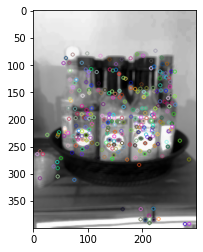

Descripteurs :  (321, 128)

[[53. 13.  0. ...  0.  0.  0.]
 [12.  5.  1. ...  0.  0.  0.]
 [20. 14. 11. ...  2.  0.  0.]
 ...
 [12. 18.  0. ...  0. 16. 74.]
 [10. 20. 94. ...  0.  0.  0.]
 [34. 61. 24. ...  0.  0.  0.]]


In [23]:
import cv2
import matplotlib.pyplot as plt
import function_cv as fnct_cv

path = photo.iloc[1]["photo"]

kp,des=fnct_cv.transform_image(path)

image=fnct_cv.get_transform_image(path)

img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()

print("Descripteurs : ", des.shape)
print()
print(des)

### Classification avec méthode SIFT 

J'ai donc essayer avec cette approche de voir si il était possible de bien distinguer les différentes classe qui sont :
- drink
- food
- menu
- interior
- outside

J'ai donc effectuer le sift sur un echantillon de 2500 image et j'ai appliqué une réduction de dimension PCA (99% de variance conservé pour garder le maximum de variance tout en reduisant le temps de calcul) et ensuite une réduction T-SNE pour visualiser le jeu de données en 2 dimensions qui donne le résutlat suivant :

<img src="img/tsne_photo_sample.png" width="800" style="center">

On voit ici que les différentes classes ce distingue suffisament, par example "menu" et totalement bien séparer des autres classse, on retrouve au centre plus vers la droite les images "interior" et "outside", et sur la partie tous à gauche "drink" et "food" (plus sur la partie haute gauche).

Cela peut semblez cohérent avec une réduction de dimension aussi importante, les descripteur similaire ce rejoigne mais des distinction semblent visible. 
Cela montres que le images peuvent se distinguer assez bien globalement.

### Modélisation finale SIFT

J'ai donc ensuite appliquer un algorithme de classificaiton sur les descripteur sans réduction de dimension pour conserver un maximum de correspondance avec l'image réel et augmenter le score final du modèle (quitte à augmenter le temps de calcul), le modèle utilisé a suivie donc le processus suivant :
- récupération des descripteur (SIFT)
- Clustering des l'ensemble des descripteurs pour avec une correspondance des descripteur similaire
- Création d'un "Bag Of Visual Word" (BOVW) par rapport au cluster de descripteur pour chaque image
- Classificiation grâce au BOVW

Voici le résutlat du modèle final (matrice de confusion): 

<img src="img/confusion_matrix_sift.jpg" width="400" style="center">

On obtien grâce à ce modèle une accuracy de 0.6, ce modèle et perfectible car n'a était entrainer que sur 10000 photo (1/10 du jeu de données)

voici un example de classification :

In [24]:
import pickle
open_classifier = open("./data/pickle/classifier_cv_sift","rb")
best_model = pickle.load(open_classifier)
open_classifier.close()

vrai classe :  drink


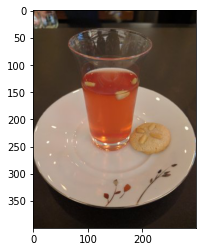


Prediction : ['drink']
Classement :
#drink : 67.87%
#outside : 11.58%
#food : 10.43%
#interior : 7.16%
#menu : 2.96%
CPU times: user 4.01 s, sys: 4.27 s, total: 8.28 s
Wall time: 534 ms


In [25]:
%%time
photo_n= 10000
path = photo.iloc[photo_n]["photo"]
label = photo.iloc[photo_n]["label"]
X_pred = fnct_cv.preprocess_1_image(path)
print("vrai classe : ",label)
img = plt.imread(path)
plt.imshow(img)
plt.show()
print()
print("Prediction :",best_model.predict(X_pred))
print("Classement :")
fnct_cv.get_classement_classifier_linear(best_model,X_pred)

## Modélisation finale CNN (Convolutional Neural Network ou Réseau Neuronal Convolutif) 

<img src="img/icon/eye.png" width="200" style="center">

Cette approche par réseau de neurone convolutif et très populaire par leur approche de couche convolutif dans le traitement des images, cette méthode permet de "réduire la tailles des images" à l'aide de filtre et de feature map.

Pour cette approche j'ai essayer 2 chose : 
- La création d'un CNN en partant de 0
- L'implémentation d'un CNN existant en modifier les dernières couches pour l'adapter à notre contexte ("transfert learning")

Le CNN de 0 est assez peu convaincant, je passerais rapidement dessus car il nécessiterais bien plus d'attention/optimisation et entrainement pour atteindre le niveau du CNN par "transfert learning". Encore une fois les détails sont dans le fichier `P06_computer_vision.ipynb` 

Les résutlat du CNN par transfert learning sont assez impressionnant en seulement 5 minute d'entrainement sur 2000 images, l'accuracy est de 90%  sur la classification d'image !

<img src="img/confusion_matrix_cnn.jpg" width="600" style="center">

Les erreurs présente semblent pouvoir être légitime, par example une image de boisson ou est présente majoritairement de la nourriture, l'algorithme peut bien evidament penser (à juste titre) que la photo est à labéliser en nourriture au lieux de boisson.

Comme nous l'avons vue dans l'étape de recherche les erreurs les plus commune semble être entre nourriture/boisson et entre intérieur/extérieur.


In [27]:
import tensorflow as tf
from tensorflow import keras
transfert = keras.models.load_model('./data/model/vgg16_transfert_learning')

vrais classe : drink


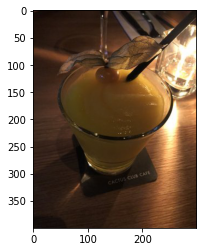

Prediction : drink
Classement :
#drink : 100.0%
#outside : 0.0%
#food : 0.0%
#interior : 0.0%
#menu : 0.0%


In [29]:
import matplotlib.pyplot as plt

photo_n= 8888
path = photo.iloc[photo_n]["photo"]
label = photo.iloc[photo_n]["label"]
image = fnct_cv.get_image_preprocess(path)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print("vrais classe :",label)
img = plt.imread(path)
plt.imshow(img)
plt.show()

prediction = transfert.predict(image)
label = prediction.argsort()[0][4] # argsort tri du plus petit au plus grand, la dernière est donc la prédiction la plus grande
label = fnct_cv.get_label(label)
print("Prediction :",label)
print("Classement :")
fnct_cv.get_classement(prediction)

Comparatif avec le modèle classification SIFT :

vrai classe :  drink


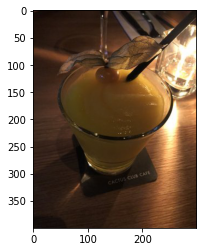


Prediction : ['drink']
Classement :
#drink : 55.62%
#food : 27.03%
#interior : 7.04%
#outside : 6.88%
#menu : 3.44%


In [31]:
X_pred = fnct_cv.preprocess_1_image(path)
print("vrai classe : ",label)
img = plt.imread(path)
plt.imshow(img)
plt.show()
print()
print("Prediction :",best_model.predict(X_pred))
print("Classement :")
fnct_cv.get_classement_classifier_linear(best_model,X_pred)

# Conclusion

<img src="img/icon/clock.png" width="200" style="center">

Pour la partie classification d'image il serais donc plus logique de partir sur le CNN en transfert learning que l'on peut encore améliorer, pour la partie identification des sujet d'insatisfaction, la méthode est perfectible, on trouve des topic intéressant mais que peuvent être ajuster certainement.

La dernière partie de ce projet et de mettre en place un dashboard présentable synthétisant les résutlat de ce projet.


<div>Icons made by <a href="https://www.flaticon.com/authors/flatart-icons" title="flatart_icons">flatart_icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>